# 1.2 Atoms of Computation

## Quick Exercises #1:

Q. If you have 𝑛 bits, how many different states can they be in?

A. $2^n$

# 1.3 Representing Qubit States

## Quick Exercises #1:

Q. Create a state vector that will give a 1/3 probability of measuring $|0\rangle$

A. Any qubit state with $|0\rangle$ amplitude having magnitude $\sqrt{1/3}$ and $|1\rangle$ amplitude having magnitude $\sqrt{2/3}$. 

Example: $\sqrt{1/3}|0\rangle + i\sqrt{2/3}|1\rangle$ = `[sqrt(1/3), sqrt(2/3)*1j]`

## Quick Exercise #2:

Q. Use `plot_bloch_sphere_spherical()` to plot a qubit in the states:

A: 
- $|0\rangle$: `coords = [0,0,1]`
- $|1\rangle$: `coords = [pi,0,1]`
- $\tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$: `coords = [pi/2,0,1]`
- $\tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$: `coords = [pi/2,pi,1]`
- $\tfrac{1}{\sqrt{2}}(i|0\rangle + |1\rangle)$: `coords = [pi/2,-pi/2,1]`

# 1.4 Single Qubit Gates

## Quick Exercises #1

Q. Verify that |+⟩ and |−⟩ are in fact eigenstates of the X-gate.

A. 
- $X|+\rangle = \tfrac{1}{\sqrt{2}}(X|0\rangle + X|1\rangle) = \tfrac{1}{\sqrt{2}}(|1\rangle + |0\rangle) = |+\rangle$
- $X|-\rangle = \tfrac{1}{\sqrt{2}}(X|0\rangle - X|1\rangle) = \tfrac{1}{\sqrt{2}}(|1\rangle - |0\rangle) = -|-\rangle$

Q. What eigenvalues do they have?

A. $|+\rangle$ has eigenvalue +1 and $|-\rangle$ has eigenvalue -1

Q. Why would we not see these eigenvalues appear on the Bloch sphere?

A. These eigenvalues appear as global phases to our qubit state, which is not measureable (e.g. $|-\rangle$ is indistinguishable from $-|-\rangle$)

Q. Find the eigenstates of the Y-gate, and their co-ordinates on the Bloch sphere.

A. 
- $\tfrac{1}{\sqrt{2}}(|0\rangle + i|1\rangle)$, Bloch coords = `[0,1,0]`
- $\tfrac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)$, Bloch coords = `[0,-1,0]`

## Quick Exercises #2

Q. Write the H-gate as the outer products of vectors |0⟩, |1⟩, |+⟩ and |−⟩

A. $H = |+\rangle\langle0| + |-\rangle\langle1|$

Q. Show that applying the sequence of gates: HZH, to any qubit state is equivalent to applying an X-gate

A. Through matrix multiplication: $HZH = \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}\begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}\tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} = X$

Q. Find a combination of X, Z and H-gates that is equivalent to a Y-gate (ignoring global phase)

A. HZXH (see code below for demonstration)

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit_textbook.tools import array_to_latex
qc = QuantumCircuit(1)
# Begin sequence of gates
qc.h(0)
qc.x(0)
qc.z(0)
qc.h(0)
# See combined unitary
simulator = Aer.get_backend('unitary_simulator')
result = execute(qc, simulator).result()
unitary = result.get_unitary()
array_to_latex(unitary)
# Is equivalent to Y-gate by factor of i
array_to_latex(unitary*1j)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Quick Exercises #3

Q. If we initialise our qubit in the state |+⟩, what is the probability of measuring it in state |−⟩?

A. 0

Q. Use Qiskit to display the probability of measuring a |0⟩ qubit in the states |+⟩ and |−⟩ (Hint: you might want to use `.get_counts()` and `plot_histogram()`).

A. (See example code below)

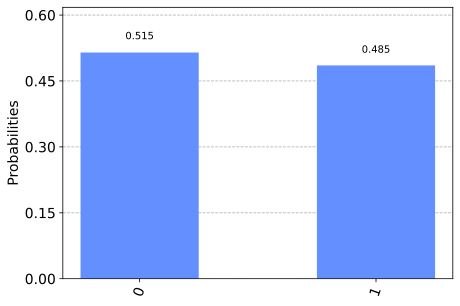

In [2]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
import numpy as np

qc = QuantumCircuit(1,1) # create quantum circuit with one qubit and one classical bit
initial_state = [1,1]/np.sqrt(2) # define our initial state as |+> (change to [1,-1]/np.sqrt(2) for |->)
qc.initialize(initial_state, 0) # add initialization operation to qubit 0
qc.measure(0,0) # measure qubit 0 and store the results in classical bit 0

backend = Aer.get_backend('qasm_simulator') # Tell Qiskit how to simulate our circuit
counts = execute(qc,backend).result().get_counts() # Do the simulation, returning the counts
plot_histogram(counts) # Display the results in a histogram

Q. Try to create a function that measures in the Y-basis

A. We want a gate the performs the transformation:

$$ \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ i \end{bmatrix} \rightarrow \begin{bmatrix} 1 \\ 0 \end{bmatrix}$$

$$ \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -i \end{bmatrix} \rightarrow \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

Either the gate $R_x$($\pi$/2) or the sequence of gates: S$^\dagger$ followed by H will accomplish this. Next, we measure in the z-basis. And finally we want to reverse the transformation:

$$ \begin{bmatrix} 1 \\ 0 \end{bmatrix} \rightarrow \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ i \end{bmatrix}$$

$$ \begin{bmatrix} 0 \\ 1 \end{bmatrix} \rightarrow \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -i \end{bmatrix}$$

Which we can do using $R_x$(-$\pi$/2) or the sequence of gates: H followed by S

Code example below:

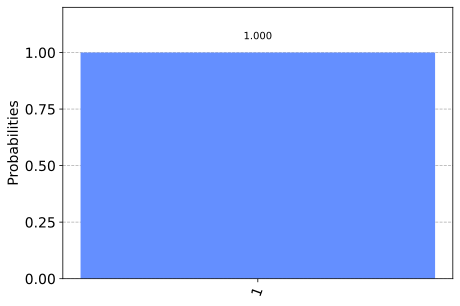

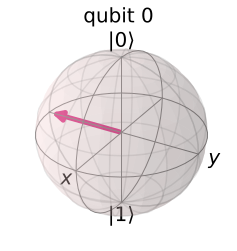

In [3]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import math

def y_measure(qc, qubit, cbit):
    qc.sdg(qubit)
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    qc.s(qubit)

qc = QuantumCircuit(1,1) # create quantum circuit with one qubit and one classical bit
initial_state = [1/math.sqrt(2), -1j/math.sqrt(2)] # define our initial state (1 in Y-basis)
qc.initialize(initial_state, 0) # add initialization operation to qubit 0
y_measure(qc, 0,0) # measure qubit 0 and store the results in classical bit 0

backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
result = execute(qc,backend).result() # Do the simulation, returning the result
display(plot_histogram(result.get_counts())) # Display the results in a histogram
plot_bloch_multivector(result.get_statevector())

## Quick Exercise #4 

Q. What are the eigenstates of the I-gate?

A. Since the I-gate leaves all states unchanged, all states are eigenstates of the I-gate with eigenvalue 1.